In [203]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import re
from PIL import Image as im
from wordcloud import WordCloud
import numpy as np
import jieba

font_set = FontProperties(fname=r"C:/Windows/Fonts/STKAITI.TTF", size=15)

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

text=pd.read_csv(r'C:/Users/dell/Desktop/python课程设计/ganjiwang.csv')
columns=['title','type','mode','size','direction','floor','quxian','community','address','money','subway','peizhi','describe']
text.columns=['title','type','mode','size','direction','floor','quxian','community','address','money','subway','peizhi','describe']

print(text.head(2))

                            title    type     mode  size direction     floor  \
0   东八区 世纪大道  奥特莱斯 水发 药谷 火炬东第精装两室  2室2厅1卫       整租  89.0        南北  高层 / 18层   
1  贤文花园南区 会展中心 丁豪广场 万达广场 三庆财富 可月付  4室2厅2卫  合租 - 次卧  18.0         南  中层 / 29层   

  quxian community           address  money             subway  \
0     历城      火炬东第  历城唐冶 - 唐冶西路1177号   1600                  无   
1     高新  贤文花园(南区)    高新国际会展中心 - 康虹路    550  距离地铁R3号线丁家庄站1575米   

                                              peizhi  \
0  ['电视', '空调', '热水器', '洗衣机', '冰箱', '床', '沙发', '衣...   
1            ['热水器', '洗衣机', '冰箱', '沙发', '宽带', '可做饭']   

                                            describe  
0  ·精装出租，全套家具家电齐全，拎包即住、省心省时省力1、中心地段，采光好，景观也非常棒！2、...  
1  您给我们一个机会——我们给您一个温馨的家!无线宽带、衣柜、大床、电脑桌、晾衣架、空调、24*...  


In [204]:
# 1. 分析各城区租赁信息
data_groupby_partition = text.groupby(by='quxian')['quxian'].count()
print(data_groupby_partition)
print(data_groupby_partition.values)
print(data_groupby_partition.index)

quxian
历下    44
历城    70
天桥     7
市中    23
槐荫    26
长清     2
高新    63
Name: quxian, dtype: int64
[44 70  7 23 26  2 63]
Index(['历下', '历城', '天桥', '市中', '槐荫', '长清', '高新'], dtype='object', name='quxian')


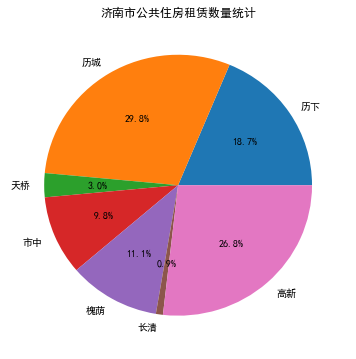

In [205]:
# 饼图
explode = [0,0,0,0,0,0,0]
plt.figure(figsize=(6,6))
plt.pie(x=data_groupby_partition.values, explode=explode,labels=data_groupby_partition.index, autopct='%1.1f%%')
plt.title("济南市公共住房租赁数量统计")
# plt.savefig("成都市六大城区公共住房租赁数量统计-饼图.jpg")
plt.show()

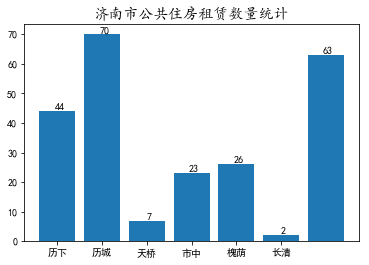

In [206]:
# 条形图
x = range(7)
plt.bar(x, data_groupby_partition.values)
for x,y in zip(range(7), data_groupby_partition.values):
    plt.text(x+0.05,y+0.05,'%d'%y, ha='center',va='bottom')
plt.title("济南市公共住房租赁数量统计",fontproperties=font_set)
plt.xticks(range(6), data_groupby_partition.index)
# plt.savefig("./成都市六大城区公共住房租赁数量统计-条形图.jpg")
plt.show()

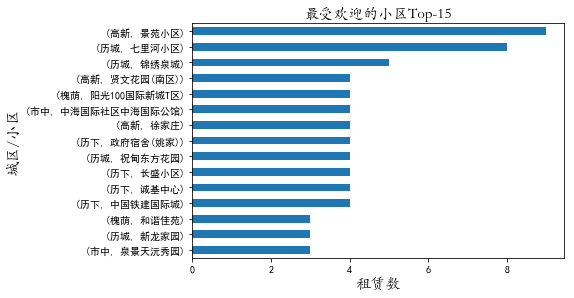

In [207]:
# 2.分析最受欢迎的小区
text.groupby(by=['quxian','community'])['community'].count().sort_values(ascending=False).head(15).sort_values().plot(kind='barh',figsize=(8,4))
plt.title("最受欢迎的小区Top-15",fontproperties=font_set)
plt.tight_layout()
plt.ylabel("城区/小区",fontproperties=font_set)
plt.xlabel("租赁数",fontproperties=font_set)
# plt.savefig("./最受欢迎的小区Top-15.jpg")
plt.show()

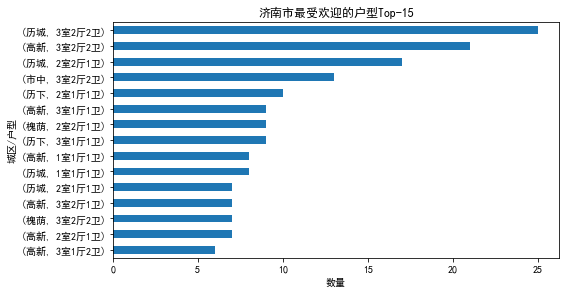

In [208]:
# 3. 按城区分析最受欢迎的户型
text.groupby(by=['quxian','type'])['type'].count().sort_values(ascending=False).head(15).sort_values().plot(kind='barh', figsize=(8,4))
plt.title("济南市最受欢迎的户型Top-15")
plt.tight_layout()
plt.ylabel("城区/户型")
plt.xlabel("数量")
# plt.savefig("./六城区最受欢迎的户型Top15.jpg")
plt.show()


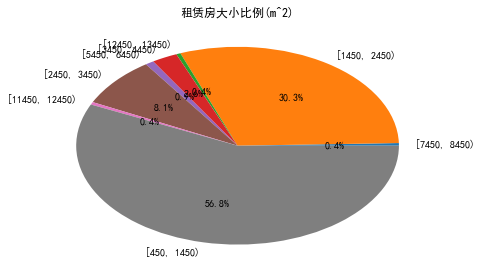

In [209]:
# 1张图-六城区总的房间大小分区统计
max = text["money"].max()
min = text["money"].min()
# 设置分组
limit = range(int(min-min%10), int(max+10), 1000)
# 进行分组
size_limit_group = pd.cut(text["money"], limit, right=False)
# 分组后的计数
size_group_count = size_limit_group.value_counts()
# 是否需要取样、排序。。。
data_sort = size_limit_group.value_counts()#.sample(frac=1)#.sort_values()
# 按照大小间隔排序，避免重叠
# 如:1 2 3 4 5 6 7  ->  7 2 5 4 3 6 1
# print(data_sort)
for x in data_sort.index:
    if data_sort[x]==0:
        del data_sort[x]
length = len(data_sort.values)
indexs = [str(x) for x in data_sort.index]

for i, j in zip(range(0, length, 2), range(length-1, 0, -2)):
    if j <= i:
        break
    data_sort.iloc[i],data_sort.iloc[j] = data_sort.iloc[j],data_sort.iloc[i]
    indexs[i], indexs[j] = indexs[j], indexs[i]
    data_sort = pd.Series(data_sort.values, index=indexs)
# print(data_sort)

# 绘图
plt.pie(data_sort.values, labels=[str(x) for x in data_sort.index],autopct='%1.1f%%')
plt.title("租赁房大小比例(m^2)")
plt.tight_layout()
plt.savefig("./租赁房大小比例(m^2).jpg")
plt.show()

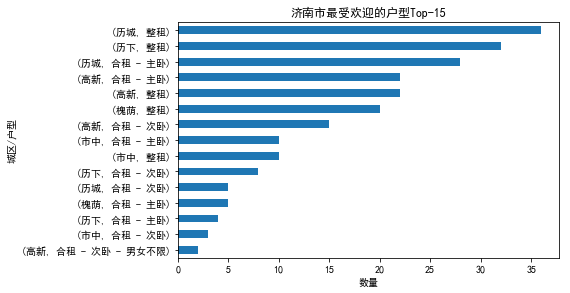

In [210]:
# 3. 按城区分析最受欢迎的户型
text.groupby(by=['quxian','mode'])['mode'].count().sort_values(ascending=False).head(15).sort_values().plot(kind='barh', figsize=(8,4))
plt.title("济南市最受欢迎的户型Top-15")
plt.tight_layout()
plt.ylabel("城区/户型")
plt.xlabel("数量")
# plt.savefig("./六城区最受欢迎的户型Top15.jpg")
plt.show()

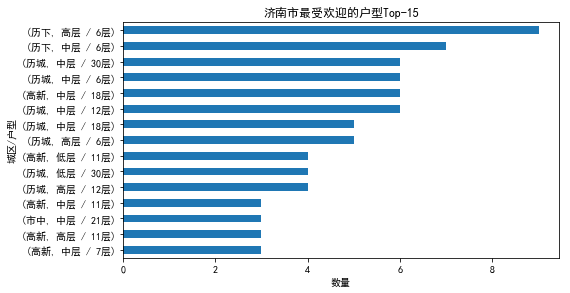

In [211]:
# 3. 按城区分析最受欢迎的户型
text.groupby(by=['quxian','floor'])['floor'].count().sort_values(ascending=False).head(15).sort_values().plot(kind='barh', figsize=(8,4))
plt.title("济南市最受欢迎的户型Top-15")
plt.tight_layout()
plt.ylabel("城区/户型")
plt.xlabel("数量")
# plt.savefig("./六城区最受欢迎的户型Top15.jpg")
plt.show()

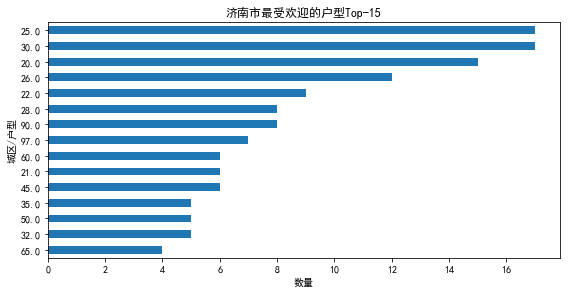

In [212]:
# 3. 按城区分析最受欢迎的户型
text.groupby(by=['size'])['size'].count().sort_values(ascending=False).head(15).sort_values().plot(kind='barh', figsize=(8,4))
plt.title("济南市最受欢迎的户型Top-15")
plt.tight_layout()
plt.ylabel("城区/户型")
plt.xlabel("数量")
# plt.savefig("./六城区最受欢迎的户型Top15.jpg")
plt.show()

[('热水器', 233), ('可做饭', 227), ('洗衣机', 226), ('沙发', 222), ('冰箱', 221), ('宽带', 216), ('暖气', 142), ('床', 141), ('衣柜', 139), ('空调', 137), ('阳台', 132), ('电视', 124)]


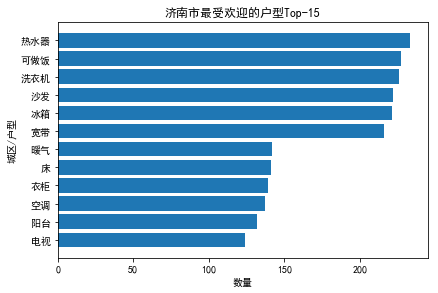

In [213]:
peizhi={}
for i in text['peizhi']:
    a=re.compile('\'(.*?)\'').findall(i)
    for m in a:
        if m in peizhi.keys():
            peizhi[m]+=1
        else:
            peizhi[m]=1

xin=sorted(peizhi.items(),key=lambda x:x[1],reverse=True)
print(xin)
mm=[i[0] for i in xin[0:15]][::-1]
mm1=[i[1] for i in xin[0:15]][::-1]
plt.barh(range(len(mm1)),mm1,tick_label = mm)

plt.title("济南市最受欢迎的户型Top-15")
plt.tight_layout()
plt.ylabel("城区/户型")
plt.xlabel("数量")
plt.show()

[' \n', '，\n', '。\n', '、\n', '；\n', '‘\n', '’\n', '：\n', '“\n', '”\n', '《\n', '》\n', '（\n', '）\n', '？\n', '！\n', '\\ufeff\n', '〇\n', '】\n', '(\n', '→\n', '…\n', '【\n', '-\n', '*\n', '．\n', '·\n', '/\n', '了\n', '等\n', '有\n', '都\n', '路\n', '和\n', '就\n', '总\n', '可\n', '这\n', '不\n', '的\n', '也\n', '之\n', '您\n', '各\n', '上\n', '一个\n', '好\n', '没\n', '我\n', '我们\n', '你\n', '你们\n', '他\n', '她\n', '它\n', '他们\n', '她们\n', '它们\n', '让\n', '给\n', '是\n', '不是\n', '在\n', '楼下\n', '挨着']
['邮电', '兆', '甲状腺', '购物', '特', '品质', '植物园', '两室', '衣柜', '安全', '幽雅', '性质', '商城', '早餐', '唯一', '怎么', '属于', '规律', '一下', '水果店', '省', '而且', '活动', '毕竟', '七不糟', '地铁口', '六里山', '数码广场', '地铁站', '低', '力所能及', '地铁', '东路', '切勿', '打电话', '楼层', '一付', '拥有', '山东师范大学', '欢迎', '白色', '强烈', '山大路', '!', '邮局', '大小', '信用社', '独好', '圭山', '千佛山', '威海', '付', '公司', '方', '大帝', '竹园', '金谷', '洗澡', '燃气灶', '假日', '专一', '书式', '人员', '融基', '压力', '名称', 'hover', '接近', '湖东路', '新村', '有时', '免高税', '未', '墙面', '景苑', '下楼', '可靠', '维持', '陈君', '商务酒店', '性价比', '防疫', '卫生间', '专业', '全自动'

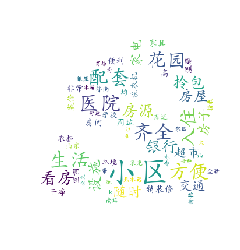

['美式', '安全', '桩', '稳定', '不如', '低', '那', '金桥', '东路', '立交', '打电话', '一付', '欢迎', '故障', '轻骑', '付', '而', '内有山', '银盛', '压力', '用户', '景苑', '可靠', '手上', '搬家', '省时省力', '四周', '优山美', '余人', '无论', '贴身', '日常生活', '明卫', '草', '通风', '政府', '亲自', '盛景', '地理位置', '通透', '一定', '尽', '价格合理', '第一张', '要求', '天禧', '可带', '学院', '回忆', '殷陈', '等等等等', '专职', '龙翔', '小孩', '长途汽车', '南北', '宴', '吃亏', '药店', '白跑', '城', '宽带', '社保', '中国航天', '菜市', '电磁炉', '真实', '齤', '海信', '炙热', '舜旺路', '使用率', '山东省', '汽车', '咨询', '免费', '屋是', '男生', '美凯空', '蹦床', '每个', '一卫', '直营', '附近', '绿地', '宽敞', '照片', '三庆', '院区', '圈', '近在咫尺', '免去', '店铺', '周边环境', '之内', '摄像头', '双', '东侧', '联系', '山东', '规则', '租约', '直接', '春江', '方利', '北胡', '用电', '豪装', '真的', '等等', '丁豪', '旅游', '人大', '筛选', '贤才', '东兴', '创智', '养', '飞', '方式', '垃圾桶', '吃饭', '还有', '第三', 'WIFI', '后', '成都', '个人', '即将', '一名', '门口', '麓', '看不中', '洪楼', '天玺', '托管', '住户', '双人床', '风景', '同比', '干部', '水波', '餐饮', '玉兰', '床', '家电', '起', '放心', '累积', '中央', '人事', '电力', '于', '清净', '维护', '美丽', '大吵大闹', '石沟', '所需', '感谢', '快', '诚意', '趴', '更加', '

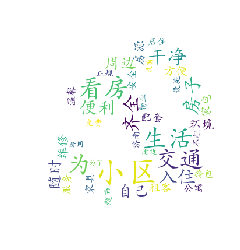

['大量', '两室', '衣柜', '安全', '中介费', '毕竟', '稳定', '力所能及', '毕业', '为了', '公司', '是否', '整租', '创造', '就近', '全自动', '专业', '无论', '这是', '转正', '吵吵闹闹', '盛景', '地理位置', '明湖', '物业费', '•', '双气', '洗衣机', '通透', '户型', '够得着', '蓝山', '要求', '保利', '澜湾', '小孩', '南北', '网络', '三', '其', '刚', '白跑', '城', '豪鲁', '社保', '一间', '真实', '合适', '安静', '为您服务', '进', '什么样', '租前', ';', '嗨', '加入', '岁', '白领', '费', '超过', '免费', '租给', '任何', '太', '或者', '美凯空', '附近', '二到', '统统', '容易', '带', '适合', '短距离', '入住', '一座', '棒', '业务员', '免去', '卧', '空调', '房子', '补贴', '力高', '所有', '服务', '封闭式', '告别', '只', '不管', '各项', '等等', '忘却', '次', '贤才', '泉路', '现在', '养', '物业公司', '满足', '简直', '吵闹', 'WIFI', '房客', '劳累', '民用', '租房', '距离', '电子', '便利', '也许', '保洁', '需求', '蓝海', '体验', '家具', '水屯路', '爱上', '标配', '宠物', '每', '路劲', '法定', '家电', '起', '简单', '放心', '方便', '丰奥嘉园', '年龄', '尽职', '人生', '人事', '签约', '包', '大吵大闹', '财经大学', '帖子', '燕山', '再寓', '苑', '租住', '华庭', '齐全', '青年', '来电', '优势', '舒适', '定期', '谢谢合作', '规范', '绿化', '帅哥美女', '地处', 'SO', '中', '清河', '就是', '东城', '家', '阳台', '恒大', '家乱', '中铁', '立交桥', '一套'

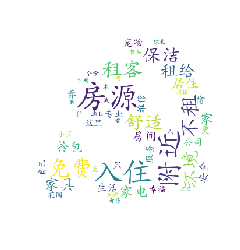

['购物', '多好', '不说', '办事处', '衣柜', '安全', '地下', '三室两厅', '进出', '中介费', '学生', '毕竟', '私密性', '力所能及', '毕业', '东路', '王官庄', '拥有', '为了', '中央空调', '欢迎', '!', '铂金', '升降', '千佛山', '巡', '公司', '往东', '老虎', '全都', '分流', '中海', '压力', '整租', '东西', '这件', '可靠', '下楼', '那么', '全自动', '专业', '卫生间', '多种', '定期检查', '无论', '吵吵闹闹', '配齐', '舒心', '园历苑', '大众', '地理位置', '商业', '大型', '坊', '物业费', '双气', '洗衣机', '到', '斤斤计较', '通透', '户型', '够得着', '五不租', '日照', '沃尔玛', '四室', '要求', '使', '椅子', '生态环境', '都行', '回忆', '冬有', '南北', '小孩', '网络', '大明湖', '三', '环宇', '刚', '月', '拍照片', '城', '土生土长', '宽带', '路线', '电磁炉', '成为', '真实', '完全', '直饮水', '合适', '进', '休闲', '贵', '优雅', '使用率', '电器', '超低', '嗨', '月付', '观景', '一表', '心苑', '岁', '白领', '由', '费', '超过', '免费', '阳光', '目前', '任何', '租给', '或者', '全天', '大路', '每个', '里', '停车位', '附近', '耕路玉', '介费', '峪', '高', '统统', '带', '宽敞', '一楼', '照片', '适合', '入住', '维修服务', 'H', '棒', '免去', '五', '周边环境', '绝无', '型', '加', '空调', '灵活', '房子', '大床', '停车', '热水器', '石防玉', '联系', '离乡背井', '所有', '山东', '电脑桌', '服务', '大平', '封闭式', '告别', '方正', '很', '人身安全', '直接', '只', '人群

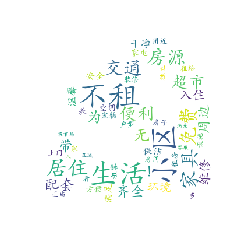

['随意', '整齐', '购物', '品质', '两室', '衣柜', '安全', '三室两厅', '桩', '商城', '进出', '出入', '而且', '稳定', '地铁', '楼层', '一付', '为了', '拥有', '欢迎', '过程', '意向', '!', '二居室', '爱家', '付', '而', '洗澡', '入学', '鑶', '人员', '万', '压力', '一系列', 'F', '旁', '餐客', '性价比', '专业', '卫生间', '多种', '六路', '定期检查', '&', '性', '事', '入托', '通风', '地理位置', '商业', '大型', '物业费', '洗衣机', '双气', '通透', '其中', '价格合理', '户型', '伶包', '预约', '椅子', '电视机', '明晰', '小学', 'wifi', '南北', '较大', '三', '该', '内设', '非常适合', '成为', '真实', '充电', '合适', '安静', '为您服务', '休闲', '优雅', ';', '设有', '麣', '华园', '观景', '整洁', '深度', '咨询', '简介', '费', '环绕', '免费', '路段', '阳光', '全天', '任何', '人民', '不到', '停车位', 'jiefei', '附近', '一卫', '房东', '欢迎光临', '买', '整体厨房', '高', '南邻经', '收取', '以', '带', '一份', '会展中心', '宽敞', '照片', '态度', '适合', '入住', '市立', '卧', '扫码', '空调', '产权', '房子', '前', '停车', '热水器', '联系', '所有', '娱乐', '服务', '人身安全', '封闭式', '方正', '随处', '很', '直接', '个人利益', '环保', '附属物', '城西区', '做到', '谈', '各项', '朋友', '素质', '快速', '医院', '一押', '次', '养', '精心', '餼', '满足', '方式', '处于', 'WIFI', '不爱', '后', '觉得', '高兴', '个人', '排除', '租房', '门口', 

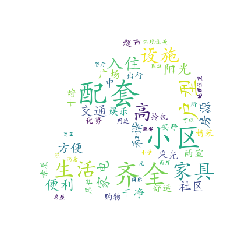

['环境优美', '简单', '车库', '学校', '三个', '开阔', '房子', '可议', '双气', '紧', '遮挡', '向阳', '楼前', '价格', '户型', '出口', '视野', '幼儿园', '家具', '基本', '卧室']


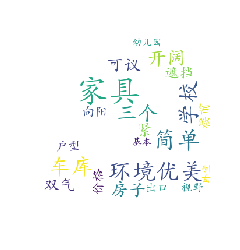

['当', '安全', '规律', '低', '切勿', '东路', '一付', '欢迎', '故障', '轻骑', '付', '不带', '东院', '银盛', '压力', '万', '名称', '可养', '景苑', '省时省力', '优山美', '独卫', '无论', '管理人员', '贴身', '燕园', '草', '出售', '盛景', '地理位置', '双气', '到', '通透', '一定', '尽', '美景', '要求', '可带', '学院', '回忆', '殷陈', '龙翔', '南北', '小孩', '较大', '药店', '宽带', '城', '起租', '扰民', '中国航天', '菜市', '电磁炉', '真实', '海信', '用电量', '舜旺路', '山东省', '使用率', '电器', '按时', '一表', '汽车', '咨询', '免费', '阳光', '附近', '房东', '绿地', '整体厨房', '宽敞', '照片', '三庆', '院区', '圈', '免去', '周边环境', '联系', '南侧', '时', '抽油烟机', '尚品', '直接', '春江', '盛世', '北胡', '用电', '豪装', '真的', '等等', '丁豪', '旅游', '快速', '价格比', '洗手间', '创智', '养', '飞', '个面', '方式', '按照', '还有', '第三', 'WIFI', '后', '出来', '个人', '虚', '过日子', '门口', '麓', '天玺', '托管', '多个', '双人床', '风景', '精选', '如实', '玉兰', '床', '家电', '像', '放心', '中央', '于', '清净', '维护', '金宇', 'CBD', '美丽', '大吵大闹', '石沟', '大批', '诚意', '更加', '华庭', '紧对', '百分之九十', '对于', '规范', '绿化', '浪潮集团', '哪儿', '图片', '就是', '家', 'jie', '季付', '中铁', '更', '七里河', '区及', '翡翠', '晾衣杆', '轻松', '元', '适宜', '星瀚城', '紧靠', '抄底', '公共', '售后', '卧室', '南湖'

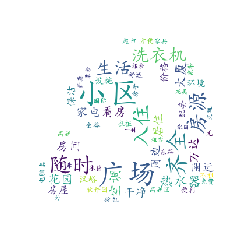

In [223]:
stop_file=open('C:/Users/dell/Desktop/python课程设计/stop_word.txt','r',encoding='utf-8')
stop_text=stop_file.readlines()
stop_file.close()
stop_words=str([word for word in stop_text])
a=text.groupby('quxian').count()
data=text.groupby('quxian')['describe'].apply(lambda x:x.str.cat(sep=':')).reset_index()
n=0
print(stop_words)
for i in data['describe']:
    cut_text=' '.join(jieba.cut(i))
    words = cut_text.split()
    words2=[re.sub('[\,\?\.\:\'\"\-1234567890]','',word) for word in words]
    word_index=set(words2)
#     print(word_index)
    word_index1=[word for word in word_index if word not in stop_words]
    print(word_index1)
    dic_words={word:words2.count(word) for word in word_index1}
#     print(dic_words)
    image=im.open('C:/Users/dell/Desktop/python课程设计/danghui.jpg')#打开图片
    graph=np.array(image)
    wc=WordCloud(
        background_color='white',
        mask=graph,
        font_path="C:/Windows/Fonts/STKAITI.TTF",
        max_font_size=200,
        min_font_size=10)
    
    wc.generate_from_frequencies(dic_words)
    
    wc.to_file(f'C:/Users/dell/Desktop/python课程设计/s{n}.jpg')
    n+=1
    plt.imshow(wc)
    plt.axis("off") #去除坐标轴
    plt.show()
